# Task-2
Problem Statement : 
    Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

# Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Titanic dataset
titanic_data = pd.read_csv("Titanic.csv")

In [3]:
# Display the first few rows of the dataset
print(titanic_data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Check for missing values
print(titanic_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Data Cleaning

In [7]:
# Fill missing values in 'Age' column with median
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

In [8]:
# Drop 'Cabin' column due to high number of missing values
titanic_data.drop('Cabin', axis=1, inplace=True)

# Drop rows with missing values in 'Embarked' column
titanic_data.dropna(subset=['Embarked'], inplace=True)

In [9]:
# Verify that missing values have been handled
print(titanic_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# Exploratory Data Analysis (EDA)

In [10]:
# Summary statistics of numeric columns
titanic_data.describe().style.background_gradient(cmap = 'Blues')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


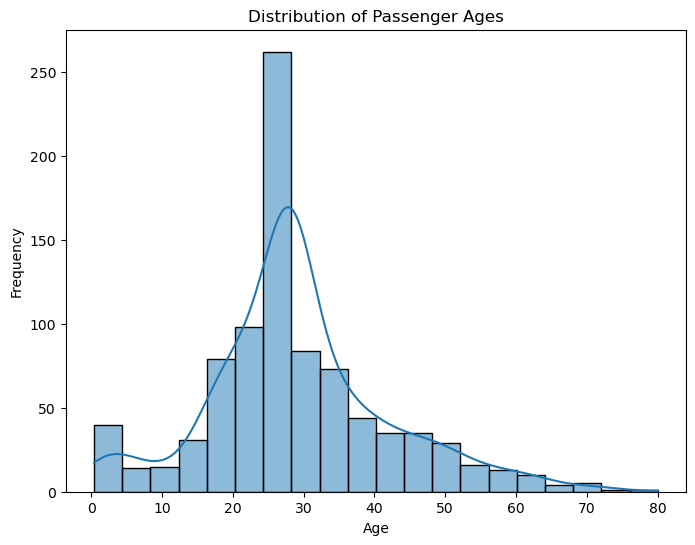

In [11]:
# Distribution of passenger ages
plt.figure(figsize=(8, 6))
sns.histplot(titanic_data['Age'], bins=20, kde=True)
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


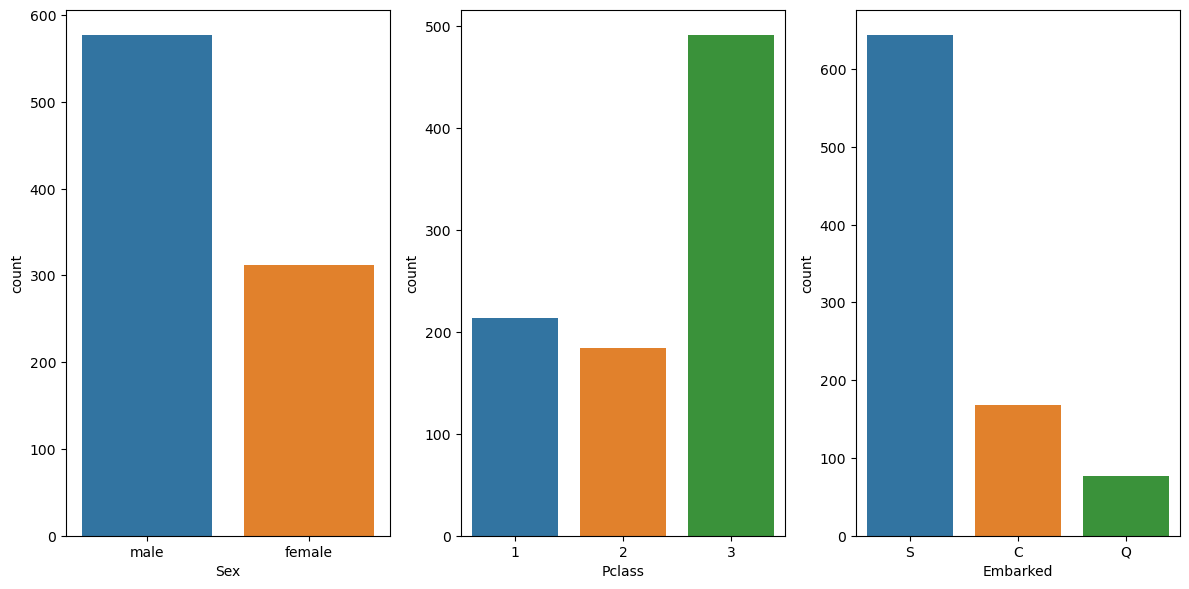

In [39]:
# Explore the distribution of categorical variables (e.g., Sex, Pclass, Embarked)
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.countplot(data=titanic_data, x='Sex')
plt.subplot(1, 3, 2)
sns.countplot(data=titanic_data, x='Pclass')
plt.subplot(1, 3, 3)
sns.countplot(data=titanic_data, x='Embarked')
plt.tight_layout()
plt.show()

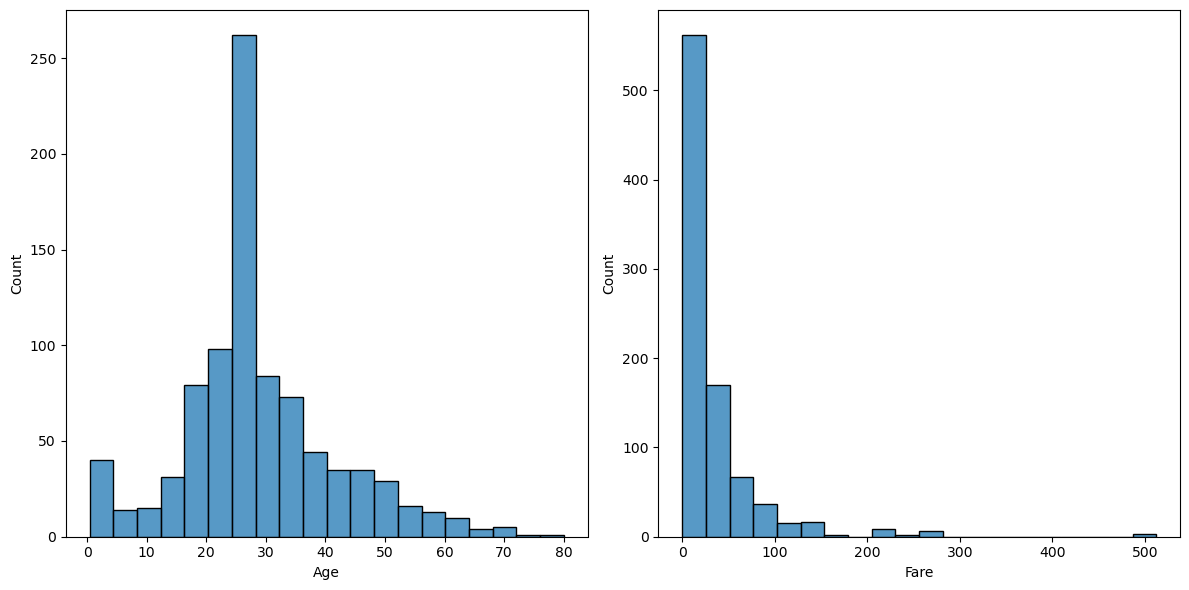

In [40]:
# Explore the distribution of numerical variables (e.g., Age, Fare)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=titanic_data, x='Age', bins=20)
plt.subplot(1, 2, 2)
sns.histplot(data=titanic_data, x='Fare', bins=20)
plt.tight_layout()
plt.show()


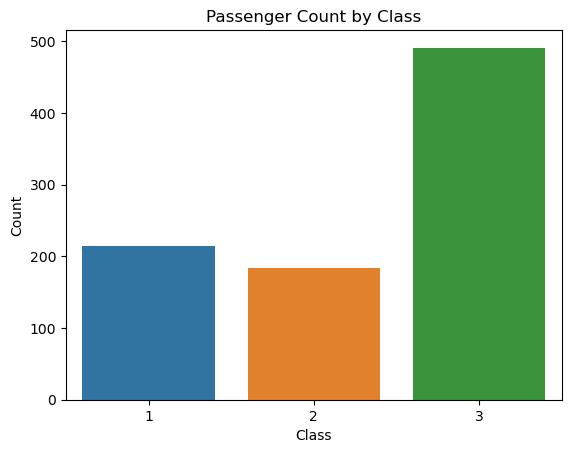

In [12]:
# Count of passengers in each class
sns.countplot(data=titanic_data, x='Pclass')
plt.title('Passenger Count by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


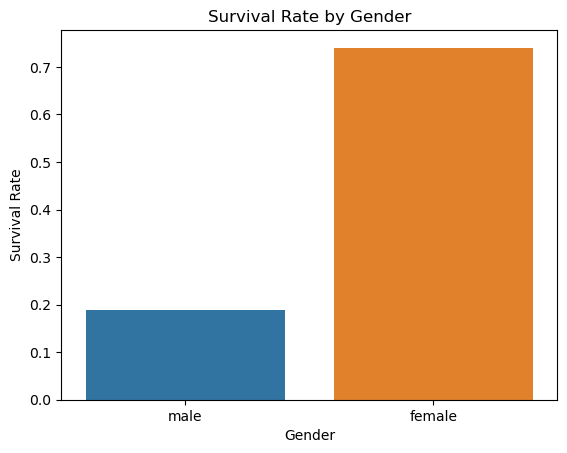

In [13]:
# Survival rate by gender
sns.barplot(data=titanic_data, x='Sex', y='Survived', ci=None)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()


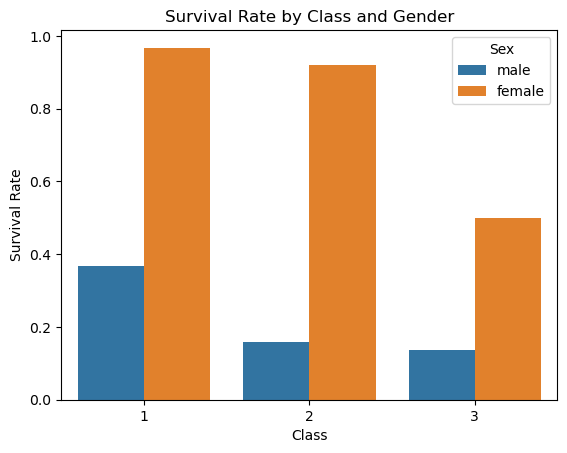

In [14]:
# Survival rate by passenger class and gender
sns.barplot(data=titanic_data, x='Pclass', y='Survived', hue='Sex', ci=None)
plt.title('Survival Rate by Class and Gender')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.show()

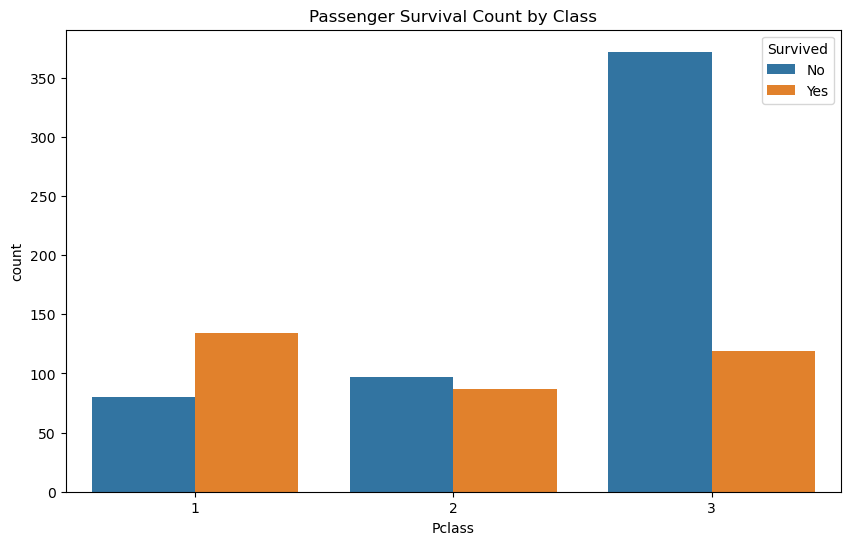

In [15]:
# Count plot of passenger survival by class
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)
plt.title('Passenger Survival Count by Class')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

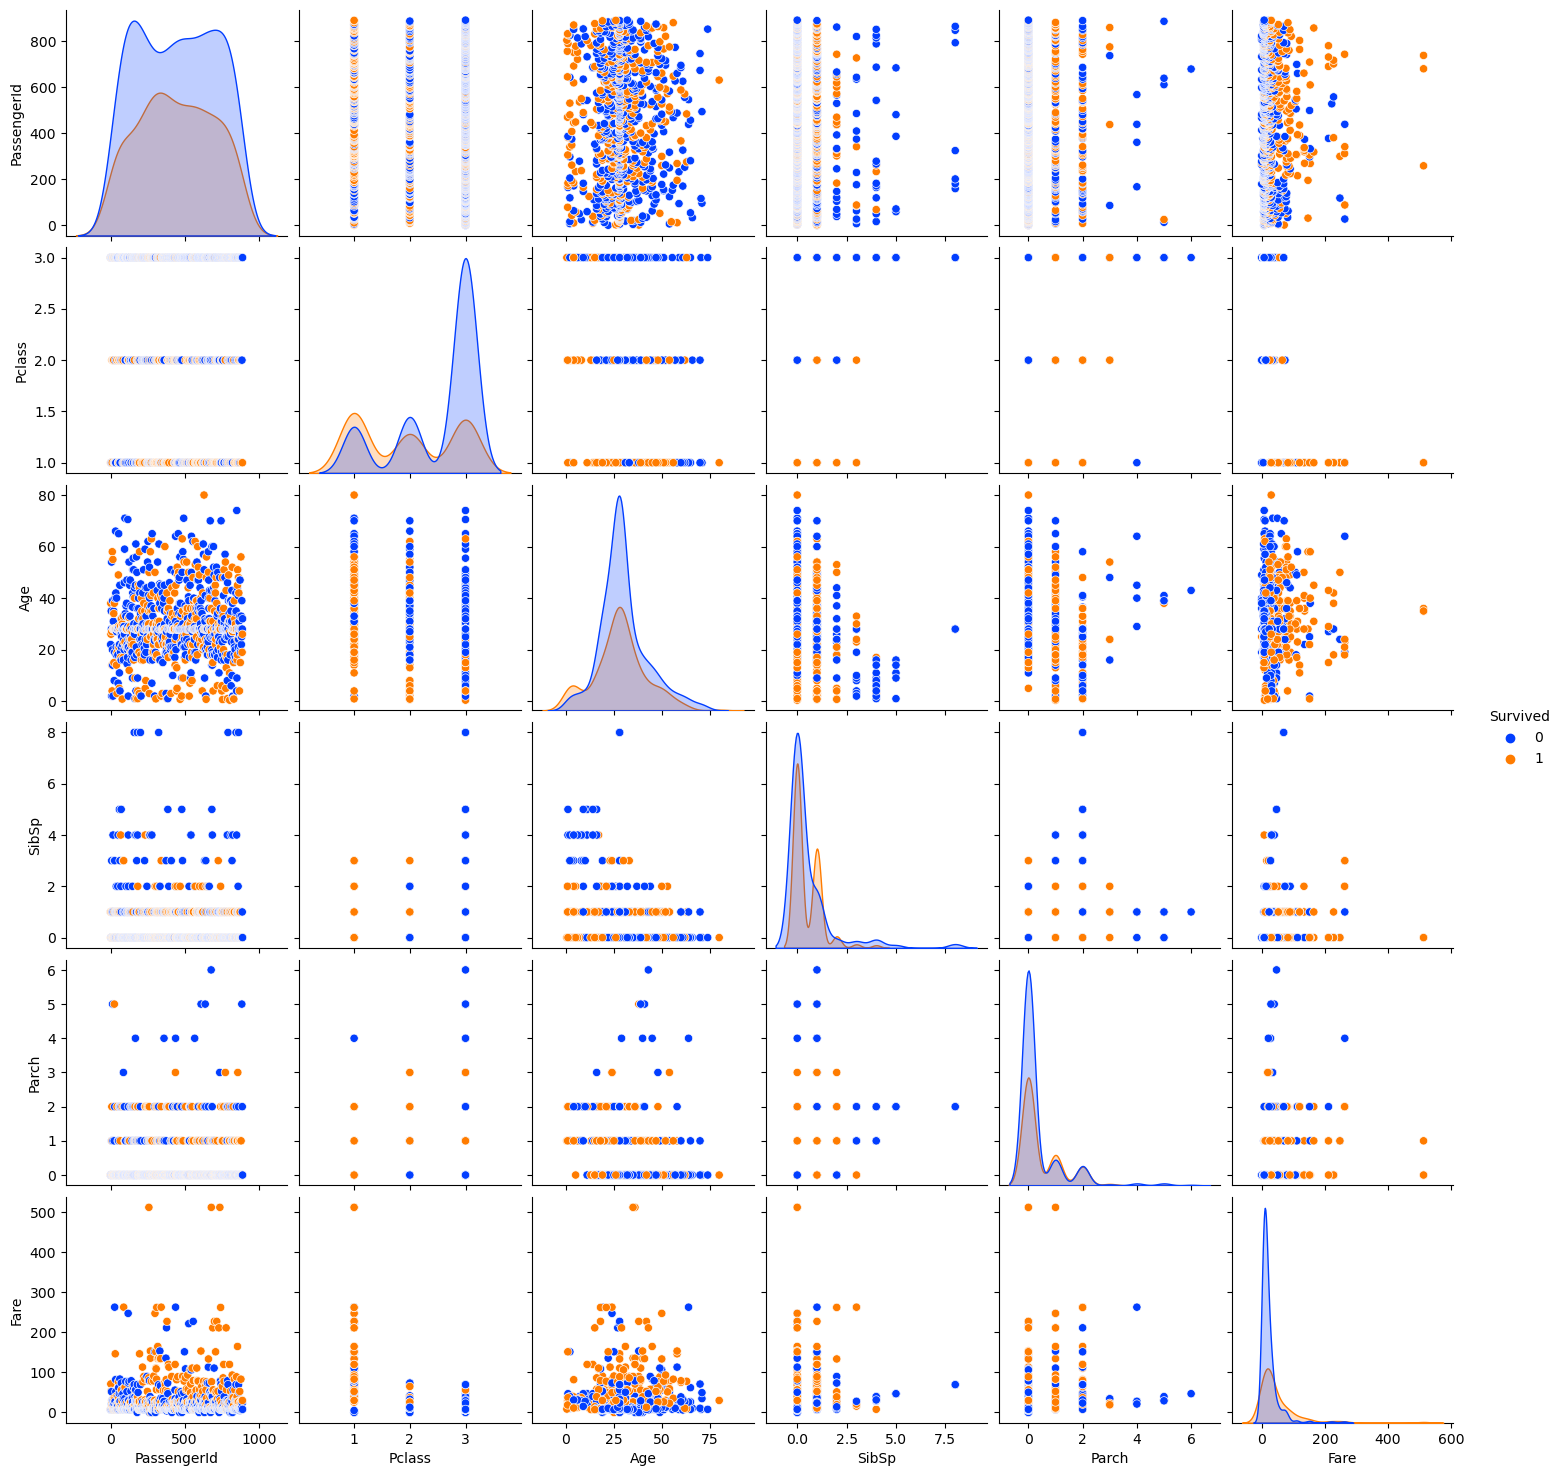

In [16]:
sns.pairplot(titanic_data,hue = 'Survived',palette='bright')

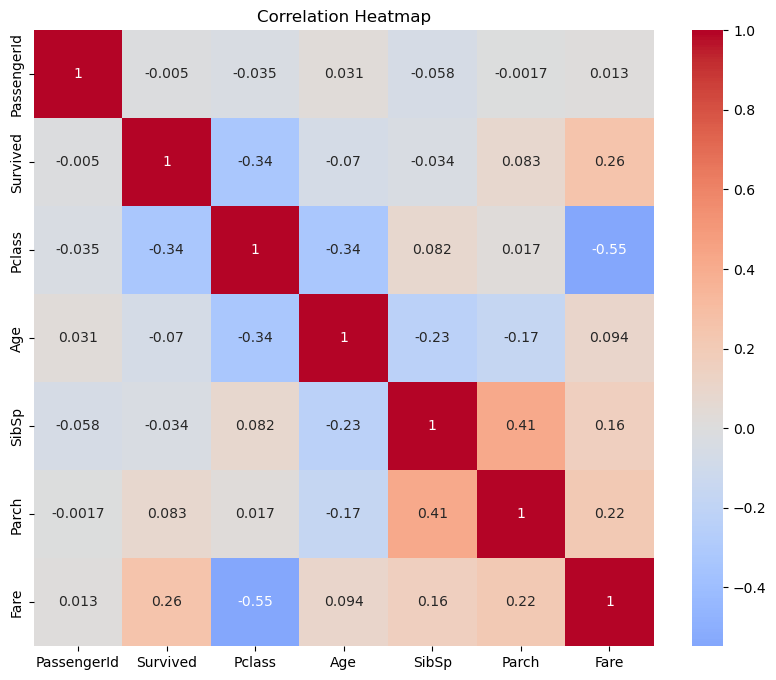

In [17]:
# Correlation heatmap
correlation_matrix = titanic_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


# Feature Engineering

In [18]:
# Create a 'FamilySize' feature by summing 'SibSp' and 'Parch'
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1

In [19]:
# Extract titles from 'Name' and create a 'Title' feature
titanic_data['Title'] = titanic_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [20]:
# Combine rare titles into a common category
rare_titles = ['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Lady', 'Jonkheer', 'Don', 'Sir']
titanic_data['Title'] = titanic_data['Title'].apply(lambda x: x if x not in rare_titles else 'Rare')

In [21]:
# Map titles to numerical values
title_mapping = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare': 4}
titanic_data['Title'] = titanic_data['Title'].map(title_mapping)

In [22]:
# Display the modified dataset
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0.0


# Conclusion

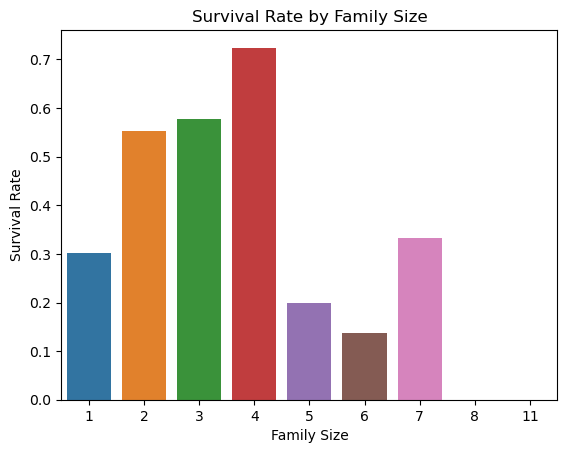

In [23]:
# Compare survival rate by family size
sns.barplot(data=titanic_data, x='FamilySize', y='Survived', ci=None)
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

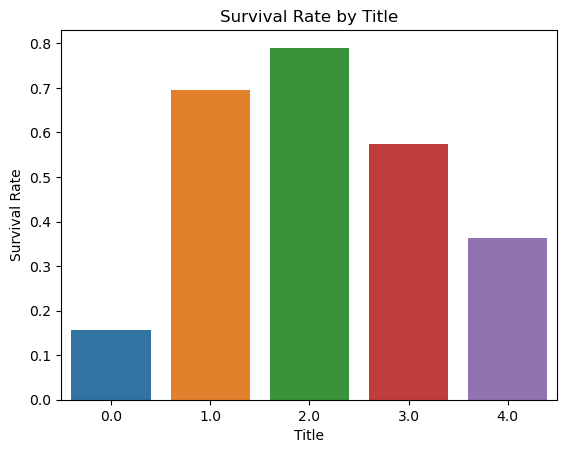

In [24]:
# Compare survival rate by title
sns.barplot(data=titanic_data, x='Title', y='Survived', ci=None)
plt.title('Survival Rate by Title')
plt.xlabel('Title')
plt.ylabel('Survival Rate')
plt.show()

In [25]:
# Calculate the proportion of passengers in each class
class_counts = titanic_data['Pclass'].value_counts()
labels = ['1st Class', '2nd Class', '3rd Class']
sizes = class_counts.values
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0.1, 0, 0) 

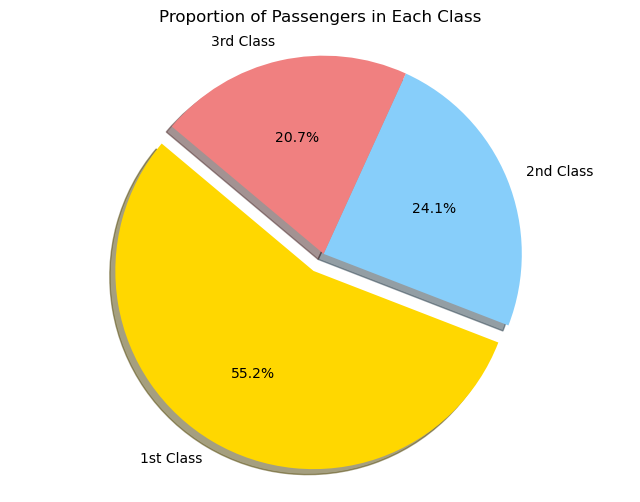

In [26]:
# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  
plt.title('Proportion of Passengers in Each Class')
plt.show()

<AxesSubplot:xlabel='Fare', ylabel='Density'>

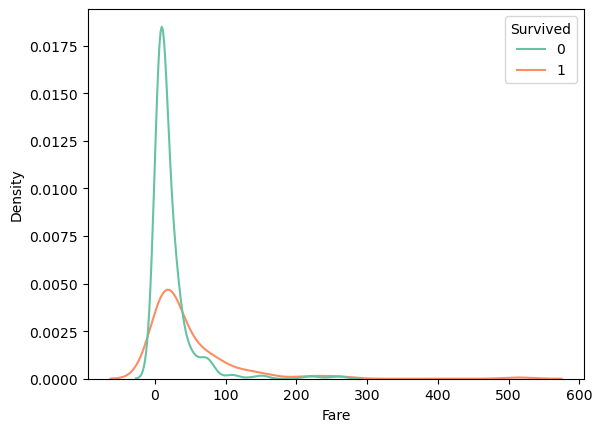

In [28]:
sns.kdeplot(x =titanic_data['Fare'],hue=titanic_data['Survived'],palette='Set2')

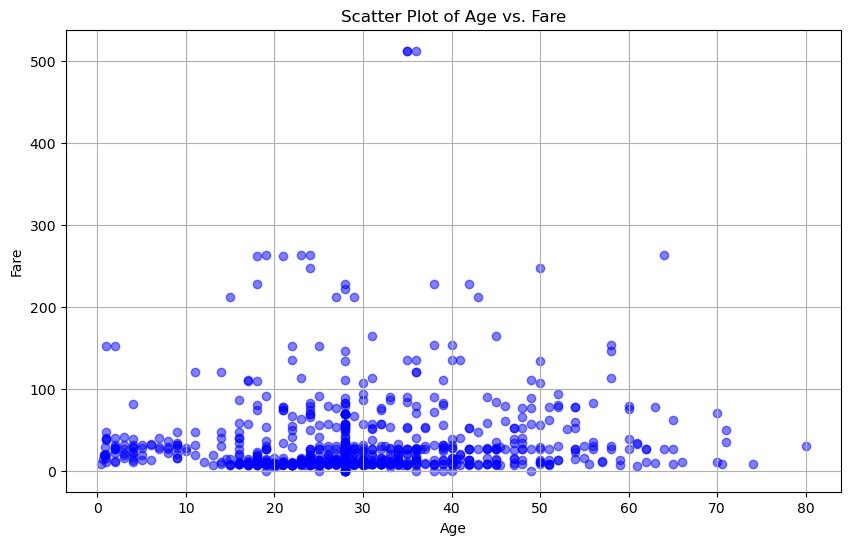

In [33]:
# Create a scatter plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(titanic_data['Age'], titanic_data['Fare'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

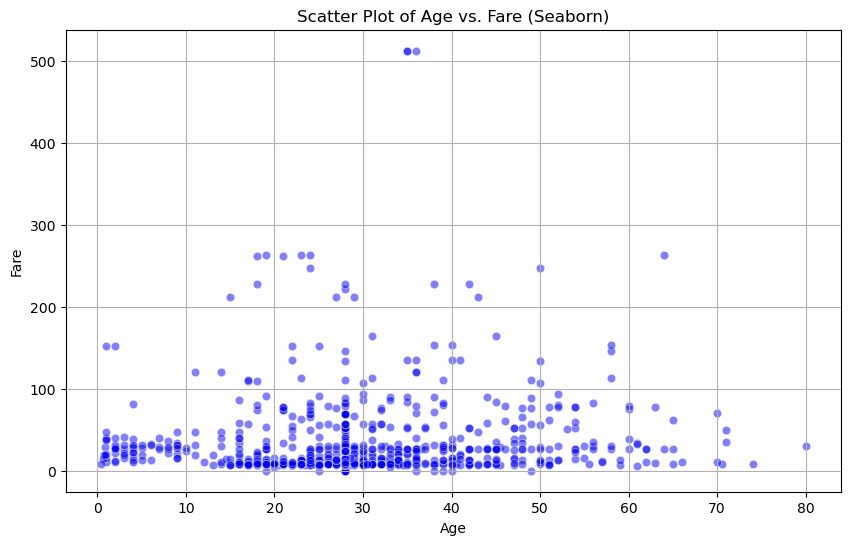

In [34]:
# Create a scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=titanic_data, color='blue', alpha=0.5)
plt.title('Scatter Plot of Age vs. Fare (Seaborn)')
plt.grid(True)
plt.show()

In [35]:
# Group data by class and title to explore trends
class_title_group = titanic_data.groupby(['Pclass', 'Title'])['Survived'].mean().reset_index()
pivot_table = class_title_group.pivot_table(values='Survived', index='Pclass', columns='Title')


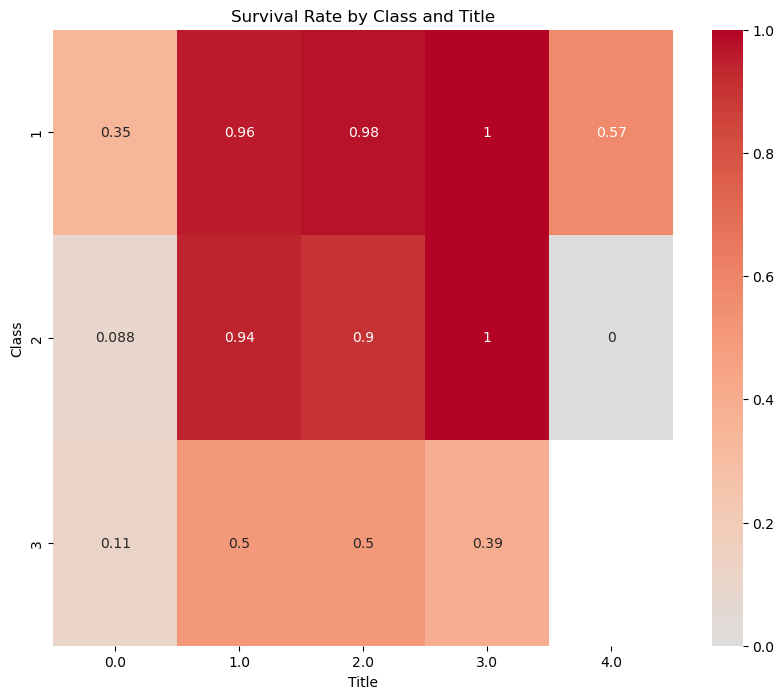

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', center=0)
plt.title('Survival Rate by Class and Title')
plt.xlabel('Title')
plt.ylabel('Class')
plt.show()


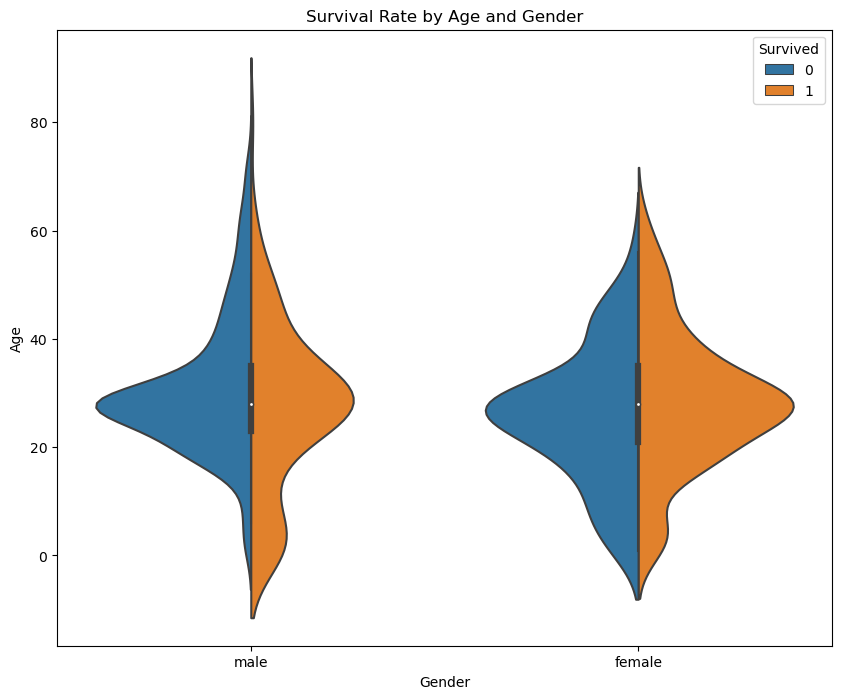

In [37]:
# Draw overall survival rate by age and gender using a violin plot
plt.figure(figsize=(10, 8))
sns.violinplot(data=titanic_data, x='Sex', y='Age', hue='Survived', split=True)
plt.title('Survival Rate by Age and Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


# Conclusion:

 In conclusion, performing data cleaning and exploratory data analysis (EDA) on a dataset, such as the Titanic dataset from Kaggle, is an essential step in the data analysis process. Through meticulous data cleaning, we ensure the accuracy and reliability of our dataset, which is fundamental for making informed decisions and drawing meaningful insights.

During the EDA phase, we delve deep into the dataset, uncovering valuable information about the relationships between variables and identifying patterns and trends that might otherwise go unnoticed. EDA allows us to visualize the data, detect outliers, and gain a better understanding of its underlying structure.

In essence, the combination of data cleaning and exploratory data analysis serves as the foundation upon which data-driven decisions and further analysis are built. It empowers data scientists and analysts to extract valuable insights, make informed predictions, and ultimately drive more effective decision-making processes. Whether it's the Titanic dataset or any other dataset, this process is a crucial initial step in the journey towards data-driven excellence.